In [1]:
import pandas as pd
import numpy as np
#import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
df = pd.read_csv('mushrooms.csv')
#df.head()

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
df.shape

(8124, 23)

In [22]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of poisonous: {}".format(df[df['class'] == 'p'].shape[0]))
print("Number of eatable: {}".format(df[df['class'] == 'e'].shape[0]))

Total number of labels: 7832
Number of poisonous: 3916
Number of eatable: 3916


In [21]:
df = df.drop(df[df['class'] == 'e'].index[list(range(292))])

In [23]:
df.shape

(7832, 23)

In [25]:
X = df.iloc[:,1:]
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
8,x,y,w,t,p,f,c,n,p,e,...,s,w,w,p,w,o,p,k,v,g
13,x,y,w,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,n,v,u
17,x,s,n,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,g


In [28]:
Y = df.iloc[:,0]

In [29]:
Y

0       p
3       p
8       p
13      p
17      p
18      p
19      p
21      p
25      p
31      p
37      p
43      p
53      p
54      p
78      p
81      p
114     p
120     p
122     p
135     p
138     p
180     p
185     p
205     p
221     p
228     p
231     p
243     p
251     p
261     p
       ..
8094    e
8095    p
8096    e
8097    p
8098    p
8099    e
8100    e
8101    p
8102    e
8103    e
8104    e
8105    e
8106    e
8107    e
8108    p
8109    e
8110    e
8111    e
8112    e
8113    p
8114    p
8115    e
8116    p
8117    p
8118    p
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder

# Encode label category
# poisonous -> 1
# eatable -> 0

mushroom_encoder = LabelEncoder()
Y = mushroom_encoder.fit_transform(Y)
Y

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [36]:
list(X.columns)

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [37]:
feature_encoder = LabelEncoder()
for feat in list(X.columns):
    X[feat] = feature_encoder.fit_transform(X[feat])
X.head()

C:\Users\SHADOWFAX\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
8,5,3,8,1,6,1,0,1,7,0,...,2,7,7,0,2,1,4,2,4,1
13,5,3,8,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,3,4,5
17,5,2,4,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,1


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [44]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [45]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
1.0


In [46]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.983404255319


In [47]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
1.0


In [48]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
1.0


In [50]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[ 0.65178571  0.89158163  1.          0.99617347  0.92346939  0.85714286
  0.99872123  0.98976982  0.93478261  0.9629156 ]


In [51]:
scores.mean()

0.92063423195365102

In [53]:
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print scores.mean()

[ 0.67346939  1.          1.          1.          1.          1.          1.
  1.          0.99488491  0.98465473]
0.96530090297


In [54]:
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print scores.mean()

[ 0.67346939  1.          1.          1.          1.          1.          1.
  1.          1.          0.98976982]
0.966323920873


In [55]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.92063423195365102, 0.91859047967012908, 0.92407876193955851, 0.92458896602119123, 0.92535427214364019, 0.92535427214364019, 0.92535427214364019, 0.93020284200636782, 0.93402937261861274, 0.93504978078187817, 0.93645284200636802, 0.93645284200636802, 0.93594263792473531, 0.93696304608800052, 0.93734569914922494, 0.93785590323085766, 0.93772835221044948, 0.93772835221044948, 0.93772835221044948, 0.93772835221044948, 0.93772835221044948, 0.93772835221044948, 0.93772835221044948, 0.93772835221044948, 0.93772835221044948]


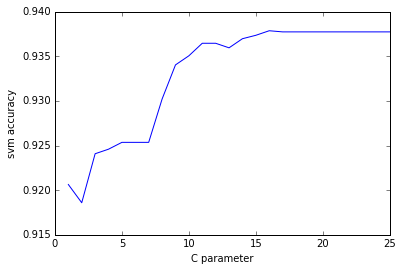

In [58]:
fig, ax = plt.subplots()
ax.plot(C_range, acc_score)
ax.set(xlabel = 'C parameter',
       ylabel = 'svm accuracy')
plt.show()

[0.93734569914922494, 0.93734569914922494, 0.93734569914922494, 0.93734569914922494, 0.93785590323085766, 0.93785590323085766, 0.93772835221044948, 0.93772835221044948, 0.93772835221044948, 0.93772835221044948, 0.93772835221044948, 0.93772835221044948, 0.93772835221044948, 0.93772835221044948, 0.93772835221044948]


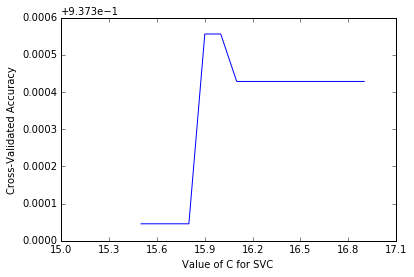

In [59]:
C_range=list(np.arange(15.5,17,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)
plt.plot(C_range,acc_score)
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(np.arange(15,17.4,0.3))
plt.show()

# Accuracy is maximum for C = 16

In [60]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.89013812046557761, 0.91347734746072329, 0.93823105329088163, 0.96734693877551015, 0.98657289002557547, 0.87119532595646942, 0.6462729657080224]


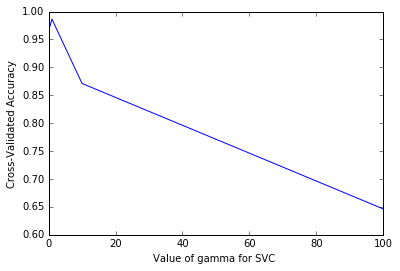

In [61]:
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')
#plt.xticks(np.arange(15,17.4,0.3))
plt.show()

C:\Users\SHADOWFAX\Anaconda2\lib\site-packages\sklearn\svm\base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
C:\Users\SHADOWFAX\Anaconda2\lib\site-packages\sklearn\svm\base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
C:\Users\SHADOWFAX\Anaconda2\lib\site-packages\sklearn\svm\base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
C:\Users\SHADOWFAX\Anaconda2\lib\site-packages\sklearn\svm\base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
C:\Users\SHADOWFAX\Anaconda2\lib\sit

[0.96530090296988347, 0.96734693877551015, 0.96542878020773526, 0.96338274440210869, 0.99117908032778312, 0.98657289002557547, 0.97787723785166247, 0.96803069053708435, 0.95678075578057309, 0.95102954225168335, 0.94847395479931118, 0.94489371835690794, 0.93645512552847221, 0.92622951354454819, 0.92175968213372317, 0.91933425544130698, 0.91383716530090298, 0.90808497311968261, 0.90552938566731045, 0.90336003966804113, 0.90055098126207012, 0.8988905344746595, 0.89774094420376849, 0.89620902708909667, 0.8959539250482802]


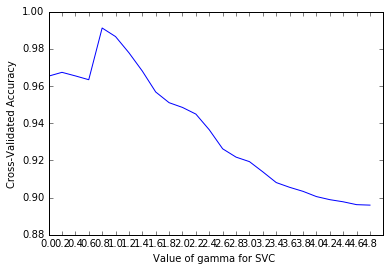

In [62]:
gamma_range=np.arange(0,5,0.2)
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(np.arange(0,5,0.2))
plt.show()

Highest Accuracy for Gamma = 0.8

In [63]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.96377159559475967, 0.96632392087269692, 0.96492020721332017, 0.96339220470797016, 0.96275510204081627]


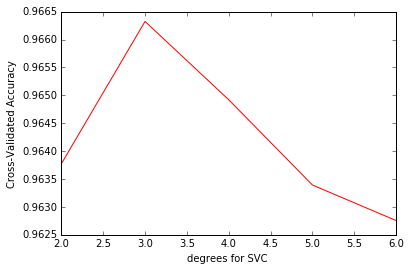

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [65]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=16)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.982978723404


In [67]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='linear',C=0.1)
scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')
print(scores)

[ 0.65178571  0.89030612  0.99234694  0.9872449   0.8877551   0.85459184
  0.99872123  0.98721228  0.92199488  0.9629156 ]


In [68]:
print scores.mean()

0.913487460201


In [69]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',gamma=0.8)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

1.0

In [71]:
svc=SVC(kernel='linear',gamma=0.01)
scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[ 0.65178571  0.89158163  1.          0.99617347  0.92346939  0.85714286
  0.99872123  0.98976982  0.93478261  0.9629156 ]
0.920634231954


In [72]:
from sklearn.svm import SVC
svc= SVC(kernel='poly',degree=3)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

1.0


In [74]:
svc=SVC(kernel='poly',degree=3)
scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[ 0.67346939  1.          1.          1.          1.          1.          1.
  1.          1.          0.98976982]
0.966323920873


In [75]:
from sklearn.svm import SVC
svm_model= SVC()

In [76]:
tuned_parameters = {
 'C': (np.arange(15.5,16.5,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(15.5,16.5,0.1)) , 'gamma': [0.78,0.79,0.80,0.81,0.82], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.78,0.79,0.80,0.81,0.82], 'C':(np.arange(15.5,16.5,0.1)) , 'kernel':['poly']
                   }

In [77]:
from sklearn.grid_search import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [78]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

1.0


In [79]:
print(model_svm.grid_scores_)

[mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'C': 15.5, 'gamma': 0.78, 'degree': 2}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'C': 15.5, 'gamma': 0.79, 'degree': 2}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'C': 15.5, 'gamma': 0.8, 'degree': 2}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'C': 15.5, 'gamma': 0.81, 'degree': 2}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'C': 15.5, 'gamma': 0.82, 'degree': 2}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'C': 15.5, 'gamma': 0.78, 'degree': 3}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'C': 15.5, 'gamma': 0.79, 'degree': 3}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'C': 15.5, 'gamma': 0.8, 'degree': 3}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'C': 15.5, 'gamma': 0.81, 'degree': 3}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'C': 15.5, 'gamma': 0.82, 'degree': 3}, mean: 1.00000, std: 0.00000, params: {'ke

In [80]:
print(model_svm.best_params_)

{'kernel': 'poly', 'C': 15.5, 'gamma': 0.78, 'degree': 2}


In [81]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

1.0
